ver: 20210916.1056

In [1]:
# Initialization for this notebook.

import numpy as np
import matplotlib.pyplot as plt

# Un-comment the following line to use interactive matplotlib widget.
#%matplotlib widget

# Returns a n seqence based on the offset provided.
seq_n = lambda seq, noff: np.arange(seq.size) - noff

# Set a better print format for numpy values.
np.set_printoptions(formatter={'float': '{: 0.3f}'.format, 'int': '{: 5d}'.format})

# 1.1 离散时间信号———序列

## 1.1.2 序列的运算

### 1. 基于对幅度的运算

**(1) 加法**
$$ z(n) = x(n) + y(n) $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, $y(n)=\{\underline{1}, 3, 2\}$, 求 $z(n)$

In [2]:
# Define the sequences.

x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1
print("x =", x, ", noff_x =", noff_x)

y = np.array([1, 3, 2]); noff_y = 0
print("y =", y, ", noff_y =", noff_y)

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [    1     3     2] , noff_y = 0


In [3]:
# Numpy's "+" operator is element-wise addition. It should be what we need, right?
z = x + y
print("x =", x)
print("y =", y)
print("z =", z)

ValueError: operands could not be broadcast together with shapes (4,) (3,) 


当多个序列间进行运算操作时，需要注意操作对序列长度的要求。例如，加法等操作要求两个数组长度相同。如果数组长度不同，常用的方法就是补零。

In [4]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1
y = np.array([1, 3, 2]); noff_y = 0

# Pad y with 0, so that it has the same length as x
y = np.concatenate((y, [0]))

z = x + y
print("x =", x)
print("y =", y)
print("z =", z)

# There is no error now, but does it mean the result is correct?
# Pay close attention to z's values!

x = [ 1.000  0.500  0.250  0.125]
y = [    1     3     2     0]
z = [ 2.000  3.500  2.250  0.125]


z = [ 2.000  3.500  2.250  0.125]


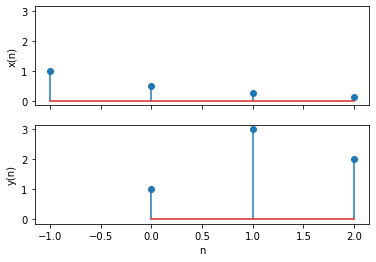

In [5]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1
y = np.array([1, 3, 2]); noff_y = 0

# Let's plot x and y to see what happens.
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[1].set_xlabel('n')
print("z =", z)

多序列运算，还特别需要注意所有数组相应于$n=0$的下标。一个常见的方法是运算前，先进行数组的对齐，即把各个数组前后补零，令到所有数组相应$n=0$的下标相同。

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [    0     1     3     2] , noff_y = 1
z = [ 1.000  1.500  3.250  2.125] , noff_z = 1


Text(0.5, 0, 'n')

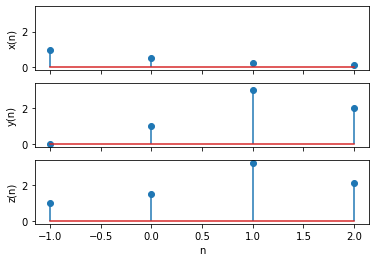

In [6]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1
y = np.array([1, 3, 2]); noff_y = 0

# Align x and y
y = np.concatenate(([0], y))
noff_y = noff_y + 1    # Why do this?

z = x + y
noff_z = noff_x

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)
print("z =", z, ", noff_z =", noff_z)

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[2].stem(seq_n(z, noff_z), z)
axs[2].set_ylabel('z(n)')
axs[2].set_xlabel('n')

**(2) 乘法**
$$ w(n)=x(n)y(n) $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, $y(n)=\{1, 3, \underline{2}\}$, 求 $w(n)$

In [ ]:
# [To be completed by students.]


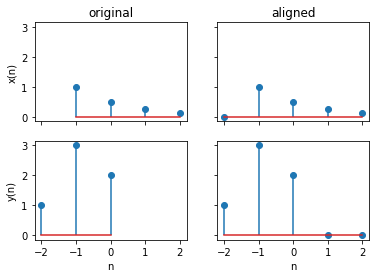

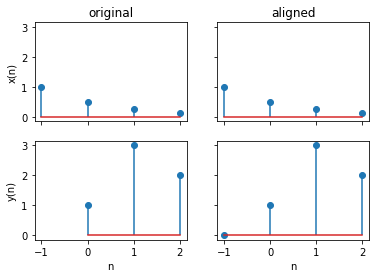

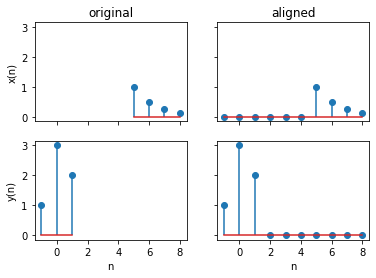

In [7]:
# [BEST PRACTICE] Build a general function for a commonly used operation.

def seq_align(seq1, noff1, seq2, noff2):
    """Align 2 sequences"""
    n_min = min(-noff1, -noff2)     # ?
    n_max = max(seq1.size-noff1-1, seq2.size-noff2-1)   # ?
    seq1 = np.pad(seq1, (-noff1-n_min, n_max-(seq1.size-noff1-1)), constant_values=(0,0))   # ?
    noff1 = -n_min  # ?
    seq2 = np.pad(seq2, (-noff2-n_min, n_max-(seq2.size-noff2-1)), constant_values=(0,0))   # ?
    noff2 = -n_min  # ?
    return (seq1, noff1, seq2, noff2)

# [BEST PRACTICE] Unit test for a complex function.
# This is not a standard unit test.
# It does not verify the result automatically, but let users to observe the plots.
# Note that this is good for education but not for engineering.
def test_seq_align():
    """Unit test for seq_align()"""
    def show_aligned_seqs(x, noff_x, y, noff_y):
        fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
        axs[0, 0].set_title('original')
        axs[0, 0].stem(seq_n(x, noff_x), x)
        axs[0, 0].set_ylabel('x(n)')
        axs[1, 0].stem(seq_n(y, noff_y), y)
        axs[1, 0].set_ylabel('y(n)')
        axs[1, 0].set_xlabel('n')

        (x, noff_x, y, noff_y) = seq_align(x, noff_x, y, noff_y)

        axs[0, 1].set_title('aligned')
        axs[0, 1].stem(seq_n(x, noff_x), x)
        axs[1, 1].stem(seq_n(y, noff_y), y)
        axs[1, 1].set_xlabel('n')

    show_aligned_seqs(np.array([1, 1/2, 1/4, 1/8]), 1, np.array([1, 3, 2]), 2)
    show_aligned_seqs(np.array([1, 1/2, 1/4, 1/8]), 1, np.array([1, 3, 2]), 0)
    show_aligned_seqs(np.array([1, 1/2, 1/4, 1/8]), -5, np.array([1, 3, 2]), 1)

# Run the unit test.
test_seq_align()

**(3) 累加**
$$ y(n) = \sum_{k=-\infty}^{n}x(k) $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $y(n)$

In [8]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1

# Why we need '+1' at the end?
# Why use np.arange() instead of range()?
y = np.array([sum(x[0:k]) for k in np.arange(x.size)+1])
noff_y = noff_x

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [ 1.000  1.500  1.750  1.875] , noff_y = 1


In [9]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1

# [BEST PRACTICE] Use built-in method whenever possible.
y = x.cumsum()
noff_y = noff_x

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [ 1.000  1.500  1.750  1.875] , noff_y = 1


**(4) 序列的绝对和**
$$ S = \sum_{n=-\infty}^{\infty} |x(n)| $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $S$

In [ ]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1

# [To be completed by students.]

**(5) 序列的能量**
$$ E[x(n)] = \sum_{n=-\infty}^{\infty} |x(n)|^{2} $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $E[x(n)]$

In [10]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1

seq_energy = lambda x: np.sum(np.power(np.abs(x),2))

E = seq_energy(x)

print("x =", x, ", noff_x =", noff_x)
print("E = ", E)

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
E =  1.328125


**(6) 序列的平均功率**
$$ P[x(n)] = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} |x(n)|^2 $$
对于周期信号，只需取一个周期 $N$ 的平均功率。

对于有限长信号，只计算有效长度 $N$ 之内平均功率。
$$ P[x(n)] = \frac{1}{N} \sum_{n=0}^{N-1} |x(n)|^2 $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $P[x(n)]$

In [ ]:
# [To be completed by students.]

### 2. 基于对变量的运算

(1) 移位
$$ y(n)=x(n-m) $$

设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $y(n)=x(n+2)$

m = -2
x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [ 1.000  0.500  0.250  0.125] , noff_y = 3


Text(0.5, 0, 'n')

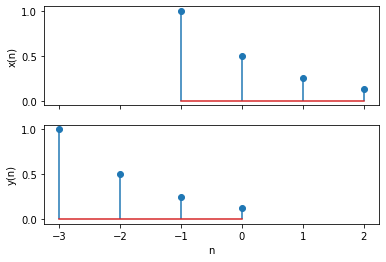

In [11]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1

m = -2  # Why not m=2?

# Build a general function.
seq_shift = lambda seq, noff, m: (seq, noff - m)   # Why noff-m?

(y, noff_y) = seq_shift(x, noff_x, m)

print("m =", m)
print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[1].set_xlabel('n')

(2) 翻褶
$$ y(n)=x(-n) $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $y(n)=x(-n)$

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [ 0.125  0.250  0.500  1.000] , noff_y = 2


Text(0.5, 0, 'n')

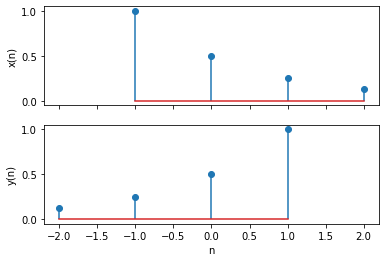

In [12]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1

y = x[::-1]
noff_y = x.size - noff_x - 1

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[1].set_xlabel('n')

设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, 求 $y(n)=x(2-n)$

x = [ 1.000  0.500  0.250  0.125] , noff_x = 1
y = [ 0.125  0.250  0.500  1.000] , noff_y = 0


Text(0.5, 0, 'n')

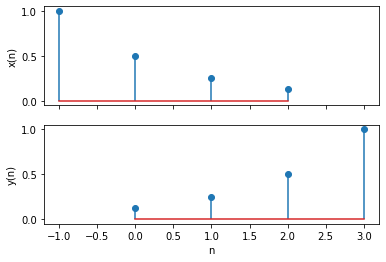

In [13]:
x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1

m = -2

y = x[::-1]
noff_y = (x.size - noff_x - 1) + m  # Why +m, not -m?

print("x =", x, ", noff_x =", noff_x)
print("y =", y, ", noff_y =", noff_y)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(y, noff_y), y)
axs[1].set_ylabel('y(n)')
axs[1].set_xlabel('n')

In [ ]:
# Build a general function for flipping a seqence.

# The API of the function:
#
# seq_flip(seq, noff)
#    Returns a flipped sequence.
#
#    Parameters: 
#        seq: array_like
#             Input sequence.
#        noff: int
#             n's offset, i.e. the index of seq where n=0.
#    Returns: (seq, noff)
#        seq: array_like
#             Output sequence.
#        noff: int
#             n's offset.

# [To be completed by students.]
# Note:
# - Requires the function and its unit test.
# - Follow the previous unit test example, test_seq_align().

In [ ]:
# Repeat the above computation y(n)=x(2-n), but this time use seq_flip() and seq_shift() instead.

# [To be completed by students.]